In [4]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Test1').getOrCreate()

Now, I'm going to read the datasets that I'm considering, i.e. "litecoin price" and "ethereum price".

In [5]:
#header specifies each column and inferschema is used to automatically detect data types, where 'lp' represents dataset for litecoin, and 'ep' represents dataset for ethereum.
lp = spark.read.csv('Dataset_main/litecoin_price (1).csv',header=True,inferSchema=True)
ep = spark.read.csv('Dataset_main/ethereum_classic_price 1.csv',header=True,inferSchema=True)

After importing the datasets, I will now view the data.

In [6]:
#Visualizing dataset in tabular format.
lp.show()
ep.show()

+------------+------+------+------+------+--------------+---------------+
|        Date|  Open|  High|   Low| Close|        Volume|     Market Cap|
+------------+------+------+------+------+--------------+---------------+
|Feb 20, 2018|223.09| 253.9|222.51|232.85|1,73,96,70,000|12,33,51,00,000|
|Feb 19, 2018|215.41|226.97|215.38|223.06|  76,75,97,000|11,90,79,00,000|
|Feb 18, 2018|230.51|232.64|214.46|215.74|1,01,11,20,000|12,73,88,00,000|
|Feb 17, 2018| 229.5|233.45| 225.6|229.47|  86,34,01,000|12,67,97,00,000|
|Feb 16, 2018| 225.5|236.09|212.33|230.12|1,30,00,90,000|12,45,53,00,000|
|Feb 15, 2018|212.35|237.88|211.17|225.43|2,08,72,90,000|11,72,57,00,000|
|Feb 14, 2018|159.58|218.23|159.58|213.36|2,38,33,40,000| 8,80,95,90,000|
|Feb 13, 2018|161.78|162.37|153.51|159.55|  48,34,68,000| 8,92,83,60,000|
|Feb 12, 2018| 150.1|163.35| 150.1|161.57|  53,57,10,000| 8,28,20,50,000|
|Feb 11, 2018|155.39|155.73|142.61|148.99|  49,57,20,000| 8,57,15,30,000|
|Feb 10, 2018|163.49|169.33|149.14|155

In [7]:
#Importing libraries like matplotlib, pandas and numpy.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
#Reading in the data again where lp_data represents dataset for litecoin and ep_data represents dataset for ethereum.
lp_data = pd.read_csv('Dataset_main/litecoin_price (1).csv')
ep_data = pd.read_csv('Dataset_main/ethereum_classic_price 1.csv')

In [9]:
#Printing litecoin dataset.
print(lp_data.columns)
lp_data.head(20)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",223.09,253.90,222.51,232.85,"1,73,96,70,000","12,33,51,00,000"
1,"Feb 19, 2018",215.41,226.97,215.38,223.06,"76,75,97,000","11,90,79,00,000"
2,"Feb 18, 2018",230.51,232.64,214.46,215.74,"1,01,11,20,000","12,73,88,00,000"
3,"Feb 17, 2018",229.50,233.45,225.60,229.47,"86,34,01,000","12,67,97,00,000"
4,"Feb 16, 2018",225.50,236.09,212.33,230.12,"1,30,00,90,000","12,45,53,00,000"
5,"Feb 15, 2018",212.35,237.88,211.17,225.43,"2,08,72,90,000","11,72,57,00,000"
6,"Feb 14, 2018",159.58,218.23,159.58,213.36,"2,38,33,40,000","8,80,95,90,000"
7,"Feb 13, 2018",161.78,162.37,153.51,159.55,"48,34,68,000","8,92,83,60,000"
8,"Feb 12, 2018",150.10,163.35,150.10,161.57,"53,57,10,000","8,28,20,50,000"
9,"Feb 11, 2018",155.39,155.73,142.61,148.99,"49,57,20,000","8,57,15,30,000"


In [10]:
#Printing ethereum dataset.
print(ep_data.columns)
ep_data.head(20)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",39.41,43.96,38.23,38.47,"1,17,58,90,000","3,94,00,10,000"
1,"Feb 19, 2018",34.69,40.26,33.93,39.29,"99,22,56,000","3,46,78,60,000"
2,"Feb 18, 2018",35.01,35.08,31.52,34.88,"45,68,29,000","3,49,83,90,000"
3,"Feb 17, 2018",34.97,35.40,34.38,34.99,"41,85,34,000","3,49,36,50,000"
4,"Feb 16, 2018",34.43,35.34,32.90,35.03,"45,67,54,000","3,43,91,80,000"
5,"Feb 15, 2018",34.83,35.65,32.83,34.53,"63,52,28,000","3,47,79,70,000"
6,"Feb 14, 2018",34.32,36.44,33.40,35.04,"1,05,53,40,000","3,42,68,60,000"
7,"Feb 13, 2018",29.88,34.73,28.32,33.96,"1,13,59,50,000","2,98,27,30,000"
8,"Feb 12, 2018",24.31,30.33,24.31,29.88,"54,17,66,000","2,42,58,00,000"
9,"Feb 11, 2018",24.53,26.00,21.42,24.13,"37,81,89,000","2,44,74,00,000"


In [11]:
#Filling in the missing values in column 'Volume' for litecoin dataset by filling in the values with 'N/A'.
filled_lp = lp.na.fill('N/A', subset=['Volume'])
filled_lp.show()
print(filled_lp['Volume'])

#Showing more than 20 rows.
filled_lp.show(filled_lp.count(), False)


+------------+------+------+------+------+--------------+---------------+
|        Date|  Open|  High|   Low| Close|        Volume|     Market Cap|
+------------+------+------+------+------+--------------+---------------+
|Feb 20, 2018|223.09| 253.9|222.51|232.85|1,73,96,70,000|12,33,51,00,000|
|Feb 19, 2018|215.41|226.97|215.38|223.06|  76,75,97,000|11,90,79,00,000|
|Feb 18, 2018|230.51|232.64|214.46|215.74|1,01,11,20,000|12,73,88,00,000|
|Feb 17, 2018| 229.5|233.45| 225.6|229.47|  86,34,01,000|12,67,97,00,000|
|Feb 16, 2018| 225.5|236.09|212.33|230.12|1,30,00,90,000|12,45,53,00,000|
|Feb 15, 2018|212.35|237.88|211.17|225.43|2,08,72,90,000|11,72,57,00,000|
|Feb 14, 2018|159.58|218.23|159.58|213.36|2,38,33,40,000| 8,80,95,90,000|
|Feb 13, 2018|161.78|162.37|153.51|159.55|  48,34,68,000| 8,92,83,60,000|
|Feb 12, 2018| 150.1|163.35| 150.1|161.57|  53,57,10,000| 8,28,20,50,000|
|Feb 11, 2018|155.39|155.73|142.61|148.99|  49,57,20,000| 8,57,15,30,000|
|Feb 10, 2018|163.49|169.33|149.14|155

In [12]:
#Filling in the missing values in column 'Volume' for ethereum dataset by filling in the values with 'N/A'.
filled_ep = ep.na.fill('N/A', subset=['Volume'])
filled_ep.show()

#Showing more than 20 rows.
filled_ep.show(filled_ep.count(), False)


+------------+-----+-----+-----+-----+--------------+--------------+
|        Date| Open| High|  Low|Close|        Volume|    Market Cap|
+------------+-----+-----+-----+-----+--------------+--------------+
|Feb 20, 2018|39.41|43.96|38.23|38.47|1,17,58,90,000|3,94,00,10,000|
|Feb 19, 2018|34.69|40.26|33.93|39.29|  99,22,56,000|3,46,78,60,000|
|Feb 18, 2018|35.01|35.08|31.52|34.88|  45,68,29,000|3,49,83,90,000|
|Feb 17, 2018|34.97| 35.4|34.38|34.99|  41,85,34,000|3,49,36,50,000|
|Feb 16, 2018|34.43|35.34| 32.9|35.03|  45,67,54,000|3,43,91,80,000|
|Feb 15, 2018|34.83|35.65|32.83|34.53|  63,52,28,000|3,47,79,70,000|
|Feb 14, 2018|34.32|36.44| 33.4|35.04|1,05,53,40,000|3,42,68,60,000|
|Feb 13, 2018|29.88|34.73|28.32|33.96|1,13,59,50,000|2,98,27,30,000|
|Feb 12, 2018|24.31|30.33|24.31|29.88|  54,17,66,000|2,42,58,00,000|
|Feb 11, 2018|24.53| 26.0|21.42|24.13|  37,81,89,000|2,44,74,00,000|
|Feb 10, 2018|25.95|26.65|23.08|24.52|  25,61,81,000|2,58,86,40,000|
|Feb 09, 2018|21.89|26.21| 21.0| 2

In [13]:
#Filling in the missing values in column 'Market Cap' for ethereum dataset by filling in the values with 'N/A'.
filled_ep_market = ep.na.fill('N/A', subset=['Market Cap'])
filled_ep_market.show()

#Showing more than 20 rows.
filled_ep_market.show(filled_ep_market.count(), False)

+------------+-----+-----+-----+-----+--------------+--------------+
|        Date| Open| High|  Low|Close|        Volume|    Market Cap|
+------------+-----+-----+-----+-----+--------------+--------------+
|Feb 20, 2018|39.41|43.96|38.23|38.47|1,17,58,90,000|3,94,00,10,000|
|Feb 19, 2018|34.69|40.26|33.93|39.29|  99,22,56,000|3,46,78,60,000|
|Feb 18, 2018|35.01|35.08|31.52|34.88|  45,68,29,000|3,49,83,90,000|
|Feb 17, 2018|34.97| 35.4|34.38|34.99|  41,85,34,000|3,49,36,50,000|
|Feb 16, 2018|34.43|35.34| 32.9|35.03|  45,67,54,000|3,43,91,80,000|
|Feb 15, 2018|34.83|35.65|32.83|34.53|  63,52,28,000|3,47,79,70,000|
|Feb 14, 2018|34.32|36.44| 33.4|35.04|1,05,53,40,000|3,42,68,60,000|
|Feb 13, 2018|29.88|34.73|28.32|33.96|1,13,59,50,000|2,98,27,30,000|
|Feb 12, 2018|24.31|30.33|24.31|29.88|  54,17,66,000|2,42,58,00,000|
|Feb 11, 2018|24.53| 26.0|21.42|24.13|  37,81,89,000|2,44,74,00,000|
|Feb 10, 2018|25.95|26.65|23.08|24.52|  25,61,81,000|2,58,86,40,000|
|Feb 09, 2018|21.89|26.21| 21.0| 2

In [14]:
#Construct the Data for litecoin dataset by adding new column 'Full Information' which states if the full information is available for that row or not.
from pyspark.sql import functions as F
lp_with_full_information=filled_lp.withColumn("FullInformation", F.when((F.col("Volume")=="N/A"),"False")\
                                      .otherwise("True"))
lp_with_full_information.show()

#Showing more than 20 rows.
lp_with_full_information.show(filled_lp.count(), False)

+------------+------+------+------+------+--------------+---------------+---------------+
|        Date|  Open|  High|   Low| Close|        Volume|     Market Cap|FullInformation|
+------------+------+------+------+------+--------------+---------------+---------------+
|Feb 20, 2018|223.09| 253.9|222.51|232.85|1,73,96,70,000|12,33,51,00,000|           True|
|Feb 19, 2018|215.41|226.97|215.38|223.06|  76,75,97,000|11,90,79,00,000|           True|
|Feb 18, 2018|230.51|232.64|214.46|215.74|1,01,11,20,000|12,73,88,00,000|           True|
|Feb 17, 2018| 229.5|233.45| 225.6|229.47|  86,34,01,000|12,67,97,00,000|           True|
|Feb 16, 2018| 225.5|236.09|212.33|230.12|1,30,00,90,000|12,45,53,00,000|           True|
|Feb 15, 2018|212.35|237.88|211.17|225.43|2,08,72,90,000|11,72,57,00,000|           True|
|Feb 14, 2018|159.58|218.23|159.58|213.36|2,38,33,40,000| 8,80,95,90,000|           True|
|Feb 13, 2018|161.78|162.37|153.51|159.55|  48,34,68,000| 8,92,83,60,000|           True|
|Feb 12, 2

In [15]:
#Construct the Data for ethereum dataset by adding new column 'Full Information' which states if the full information is available for that row or not.
from pyspark.sql import functions as F
ep_with_full_information=filled_ep.withColumn("FullInformation", F.when((F.col("Volume")=="N/A"),"False")\
                                      .otherwise("True"))
ep_with_full_information.show()

#Showing more than 20 rows.
ep_with_full_information.show(filled_ep.count(), False)

+------------+-----+-----+-----+-----+--------------+--------------+---------------+
|        Date| Open| High|  Low|Close|        Volume|    Market Cap|FullInformation|
+------------+-----+-----+-----+-----+--------------+--------------+---------------+
|Feb 20, 2018|39.41|43.96|38.23|38.47|1,17,58,90,000|3,94,00,10,000|           True|
|Feb 19, 2018|34.69|40.26|33.93|39.29|  99,22,56,000|3,46,78,60,000|           True|
|Feb 18, 2018|35.01|35.08|31.52|34.88|  45,68,29,000|3,49,83,90,000|           True|
|Feb 17, 2018|34.97| 35.4|34.38|34.99|  41,85,34,000|3,49,36,50,000|           True|
|Feb 16, 2018|34.43|35.34| 32.9|35.03|  45,67,54,000|3,43,91,80,000|           True|
|Feb 15, 2018|34.83|35.65|32.83|34.53|  63,52,28,000|3,47,79,70,000|           True|
|Feb 14, 2018|34.32|36.44| 33.4|35.04|1,05,53,40,000|3,42,68,60,000|           True|
|Feb 13, 2018|29.88|34.73|28.32|33.96|1,13,59,50,000|2,98,27,30,000|           True|
|Feb 12, 2018|24.31|30.33|24.31|29.88|  54,17,66,000|2,42,58,00,0

In [16]:
#Sorting the data using date and casting columns 'Volume' and 'Market Cap' as int.
import pyspark.sql.types as T
F.col("Volume").cast('int')
F.col('Market Cap').cast('Float')
lp=lp.orderBy('Date')
lp.show()

+------------+-----+-----+-----+-----+------------+------------+
|        Date| Open| High|  Low|Close|      Volume|  Market Cap|
+------------+-----+-----+-----+-----+------------+------------+
|Apr 01, 2014|12.77|13.67|12.76|13.13|   73,46,120|34,58,10,000|
|Apr 01, 2015| 1.65| 1.68| 1.63| 1.66|   12,45,880| 6,23,51,500|
|Apr 01, 2016| 3.25| 3.26| 3.23| 3.24|   13,16,230|14,65,76,000|
|Apr 01, 2017| 6.65| 6.98| 6.31| 6.88| 5,77,11,700|33,55,26,000|
|Apr 02, 2014|13.09|13.37|10.94|11.29| 1,49,66,900|35,48,25,000|
|Apr 02, 2015| 1.67| 1.69| 1.66| 1.68|   12,54,970| 6,29,94,200|
|Apr 02, 2016| 3.25| 3.28| 3.24| 3.26|   11,74,830|14,66,29,000|
|Apr 02, 2017| 6.86| 7.94| 6.65| 7.74| 8,85,60,400|34,62,09,000|
|Apr 03, 2014|11.26|11.26|10.29|11.05| 1,09,85,500|30,55,79,000|
|Apr 03, 2015| 1.68|  1.7| 1.68|  1.7|   10,53,650| 6,34,14,000|
|Apr 03, 2016| 3.26| 3.27| 3.25| 3.26|   12,81,200|14,73,78,000|
|Apr 03, 2017| 7.74| 8.64| 7.24| 8.07|11,41,79,000|39,08,02,000|
|Apr 04, 2014|11.07|11.39

In [17]:
#Before casting.
print(lp.dtypes)

[('Date', 'string'), ('Open', 'double'), ('High', 'double'), ('Low', 'double'), ('Close', 'double'), ('Volume', 'string'), ('Market Cap', 'string')]


In [18]:
#After casting, the datatype in litecoin dataset.
print(lp_data.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object


The above result sorts the column 'Date' in alphabetical order and also converts datatype from object to int.

In [19]:
#Formatting the column names such that it is easy to kown which column is for litecoin dataset.
lp_data.columns = ['Date', 'Open_litecoin','High_litecoin', 'Low_litecoin', 'Close_litecoin', 'Volume_litecoin', 'Market_Cap_litecoin']
lp_data.head()

,Date,Open_litecoin,High_litecoin,Low_litecoin,Close_litecoin,Volume_litecoin,Market_Cap_litecoin
0,"Feb 20, 2018",223.09,253.90,222.51,232.85,"1,73,96,70,000","12,33,51,00,000"
1,"Feb 19, 2018",215.41,226.97,215.38,223.06,"76,75,97,000","11,90,79,00,000"
2,"Feb 18, 2018",230.51,232.64,214.46,215.74,"1,01,11,20,000","12,73,88,00,000"
3,"Feb 17, 2018",229.50,233.45,225.60,229.47,"86,34,01,000","12,67,97,00,000"
4,"Feb 16, 2018",225.50,236.09,212.33,230.12,"1,30,00,90,000","12,45,53,00,000"


In [20]:
#Formatting the column names such that it is easy to kown which column is for ethereum dataset.
ep_data.columns = ['Date', 'Open_ethereum','High_ethereum', 'Low_ethereum', 'Close_ethereum', 'Volume_ethereum', 'Market_Cap_ethereum']
ep_data.head()

,Date,Open_ethereum,High_ethereum,Low_ethereum,Close_ethereum,Volume_ethereum,Market_Cap_ethereum
0,"Feb 20, 2018",39.41,43.96,38.23,38.47,"1,17,58,90,000","3,94,00,10,000"
1,"Feb 19, 2018",34.69,40.26,33.93,39.29,"99,22,56,000","3,46,78,60,000"
2,"Feb 18, 2018",35.01,35.08,31.52,34.88,"45,68,29,000","3,49,83,90,000"
3,"Feb 17, 2018",34.97,35.40,34.38,34.99,"41,85,34,000","3,49,36,50,000"
4,"Feb 16, 2018",34.43,35.34,32.90,35.03,"45,67,54,000","3,43,91,80,000"


In [21]:
#Printing the column name for litecoin dataset.
print(lp_data.columns)

Index(['Date', 'Open_litecoin', 'High_litecoin', 'Low_litecoin',
       'Close_litecoin', 'Volume_litecoin', 'Market_Cap_litecoin'],
      dtype='object')


In [22]:
#Printing the column name for ethereum dataset.
print(ep_data.columns)

Index(['Date', 'Open_ethereum', 'High_ethereum', 'Low_ethereum',
       'Close_ethereum', 'Volume_ethereum', 'Market_Cap_ethereum'],
      dtype='object')


In [23]:
#Viewing the index for litecoin dataset.
print(lp_data.index)

RangeIndex(start=0, stop=1760, step=1)


In [24]:
#Viewing the index for ethereum dataset.
print(ep_data.index)

RangeIndex(start=0, stop=1761, step=1)


In [25]:
#Viewing the number of count of data for litecoin dataset.
print(len(lp_data.index))

1760


In [26]:
#Viewing the number of count of data for ethereum dataset.
print(len(ep_data.index))

1761


In [27]:
#Viewing the total number of rows and columns in litecoin dataset.
print(lp_data.shape)

(1760, 7)


In [28]:
#Viewing the total number of rows and columns in ethereum dataset.
print(ep_data.shape)

(1761, 7)


In [29]:
#Before casting.
print(lp_data.dtypes)

Date                    object
Open_litecoin          float64
High_litecoin          float64
Low_litecoin           float64
Close_litecoin         float64
Volume_litecoin         object
Market_Cap_litecoin     object
dtype: object


In [30]:
#Sorting the data using date and casting columns 'Volume' and 'Market Cap' as int.
import pyspark.sql.types as T
F.col("Volume").cast('int')
F.col('Market Cap').cast('Float')
ep=ep.orderBy('Date')
ep.show()

+------------+-----+-----+-----+-----+-----------+------------+
|        Date| Open| High|  Low|Close|     Volume|  Market Cap|
+------------+-----+-----+-----+-----+-----------+------------+
|Apr 01, 2014|12.77|13.67|12.76|13.13|  73,46,120|34,58,10,000|
|Apr 01, 2015| 1.65| 1.68| 1.63| 1.66|  12,45,880| 6,23,51,500|
|Apr 01, 2016| 3.25| 3.26| 3.23| 3.24|  13,16,230|14,65,76,000|
|Apr 01, 2017| 2.82| 2.82| 2.75| 2.76|  63,21,790|25,42,92,000|
|Apr 02, 2014|13.09|13.37|10.94|11.29|1,49,66,900|35,48,25,000|
|Apr 02, 2015| 1.67| 1.69| 1.66| 1.68|  12,54,970| 6,29,94,200|
|Apr 02, 2016| 3.25| 3.28| 3.24| 3.26|  11,74,830|14,66,29,000|
|Apr 02, 2017| 2.75| 2.82| 2.52| 2.64|1,08,83,300|24,85,88,000|
|Apr 03, 2014|11.26|11.26|10.29|11.05|1,09,85,500|30,55,79,000|
|Apr 03, 2015| 1.68|  1.7| 1.68|  1.7|  10,53,650| 6,34,14,000|
|Apr 03, 2016| 3.26| 3.27| 3.25| 3.26|  12,81,200|14,73,78,000|
|Apr 03, 2017| 2.65| 2.77| 2.51|  2.6|  97,22,960|23,94,40,000|
|Apr 04, 2014|11.07|11.39|10.72|11.02|  

The above result sorts the column 'Date' in alphabetical order and also converts datatype from object to int.

In [31]:
#After casting, the datatype in ethereum dataset.
print(ep_data.dtypes)

Date                    object
Open_ethereum          float64
High_ethereum          float64
Low_ethereum           float64
Close_ethereum         float64
Volume_ethereum         object
Market_Cap_ethereum     object
dtype: object


In [32]:
#Summary for litecoin dataset.
lp_data.describe()

,Open_litecoin,High_litecoin,Low_litecoin,Close_litecoin
count,1760.000000,1760.000000,1760.000000,1760.000000
mean,20.380523,21.555261,19.165580,20.496602
std,46.937996,50.142566,43.540576,47.159354
min,1.150000,1.340000,1.110000,1.160000
25%,3.110000,3.170000,3.060000,3.110000
50%,3.910000,3.985000,3.840000,3.910000
75%,12.072500,12.632500,11.350000,12.165000
max,359.130000,375.290000,335.680000,358.340000


In [33]:
#Summary for ethereum dataset.
ep_data.describe()

,Open_ethereum,High_ethereum,Low_ethereum,Close_ethereum
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,7.458336,7.867909,7.044288,7.477007
std,8.426771,9.091309,7.740565,8.452639
min,0.604737,0.766068,0.452446,0.602402
25%,2.330000,2.450000,2.210000,2.310000
50%,3.550000,3.620000,3.470000,3.550000
75%,10.520000,10.970000,10.290000,10.550000
max,44.530000,53.150000,40.850000,44.730000


In [34]:
type(lp_data['High_litecoin'])

pandas.core.series.Series

In [35]:
type(ep_data['High_ethereum'])

pandas.core.series.Series

In [36]:
lp_data['High_litecoin'].mean()

21.555261363636365

In [37]:
ep_data['High_ethereum'].mean()

7.867908806360023

In [38]:
type(lp_data['Volume_litecoin'])

pandas.core.series.Series

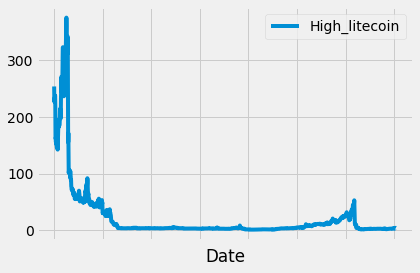

In [39]:
# Visualization through matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('fivethirtyeight')

lp_data.plot(x='Date', y="High_litecoin")

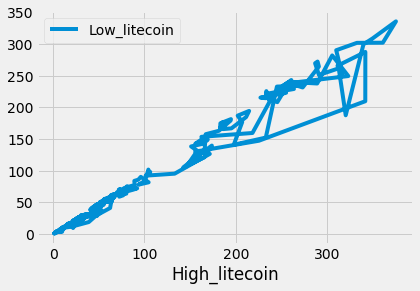

In [40]:
lp_data.plot(x='High_litecoin', y="Low_litecoin")


In [41]:
#Selecting columns which I feel is important for further exploration from litecoin dataset.
lp_data.loc[:, ['Date', 'High_litecoin', 'Open_litecoin', 'Low_litecoin', 'Close_litecoin']]


,Date,High_litecoin,Open_litecoin,Low_litecoin,Close_litecoin
0,"Feb 20, 2018",253.90,223.09,222.51,232.85
1,"Feb 19, 2018",226.97,215.41,215.38,223.06
2,"Feb 18, 2018",232.64,230.51,214.46,215.74
3,"Feb 17, 2018",233.45,229.50,225.60,229.47
4,"Feb 16, 2018",236.09,225.50,212.33,230.12
5,"Feb 15, 2018",237.88,212.35,211.17,225.43
6,"Feb 14, 2018",218.23,159.58,159.58,213.36
7,"Feb 13, 2018",162.37,161.78,153.51,159.55
8,"Feb 12, 2018",163.35,150.10,150.10,161.57
9,"Feb 11, 2018",155.73,155.39,142.61,148.99


In [42]:
#Selecting columns which I feel is important for further exploration from ethereum dataset.
ep_data.loc[:, ['Date', 'High_ethereum', 'Open_ethereum', 'Low_ethereum', 'Close_ethereum']]


,Date,High_ethereum,Open_ethereum,Low_ethereum,Close_ethereum
0,"Feb 20, 2018",43.96,39.41,38.23,38.47
1,"Feb 19, 2018",40.26,34.69,33.93,39.29
2,"Feb 18, 2018",35.08,35.01,31.52,34.88
3,"Feb 17, 2018",35.40,34.97,34.38,34.99
4,"Feb 16, 2018",35.34,34.43,32.90,35.03
5,"Feb 15, 2018",35.65,34.83,32.83,34.53
6,"Feb 14, 2018",36.44,34.32,33.40,35.04
7,"Feb 13, 2018",34.73,29.88,28.32,33.96
8,"Feb 12, 2018",30.33,24.31,24.31,29.88
9,"Feb 11, 2018",26.00,24.53,21.42,24.13
